# Cleaning

In [198]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 684 µs (started: 2022-12-10 16:58:30 -08:00)


In [199]:
sns.set_theme()
df = pd.read_csv("AAPL.csv")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

time: 2.87 ms (started: 2022-12-10 16:58:30 -08:00)


In [200]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-11,42.299999,43.222500,42.197498,43.167500,41.047958,141095200
1,2017-12-12,43.037498,43.097500,42.865002,42.924999,40.817364,77636800
2,2017-12-13,43.125000,43.384998,43.000000,43.067501,40.952888,95273600
3,2017-12-14,43.099998,43.282501,42.912498,43.055000,40.940990,81906000
4,2017-12-15,43.407501,43.542500,43.115002,43.492500,41.357006,160677200


time: 2.89 ms (started: 2022-12-10 16:58:30 -08:00)


In [201]:
def dConditions(s):
    if (s['Open'] > s['Close']):
        return "Down"
    elif (s['Close'] > s['Open']):
        return "Up"
    elif (s['Open'] == s['Close']):
        return "Stagnant"
    else:
        return "Error"

time: 256 µs (started: 2022-12-10 16:58:30 -08:00)


In [202]:
df['Direction'] = df.apply(dConditions, axis=1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
0,2017-12-11,42.299999,43.222500,42.197498,43.167500,41.047958,141095200,Up
1,2017-12-12,43.037498,43.097500,42.865002,42.924999,40.817364,77636800,Down
2,2017-12-13,43.125000,43.384998,43.000000,43.067501,40.952888,95273600,Down
3,2017-12-14,43.099998,43.282501,42.912498,43.055000,40.940990,81906000,Down
4,2017-12-15,43.407501,43.542500,43.115002,43.492500,41.357006,160677200,Up


time: 12.8 ms (started: 2022-12-10 16:58:30 -08:00)


In [203]:
df['Datetime'] = pd.to_datetime(df['Date'])
df['DayName'] = df['Datetime'].dt.day_name()
df['Month'] = df['Datetime'].dt.month_name()
df['Year'] = pd.DatetimeIndex(df['Datetime']).year
df['Day'] = pd.DatetimeIndex(df['Datetime']).day
df['pOpen'] = df['Open'].shift(1)
df['pClose'] = df['Close'].shift(1)
df['pAdjClose'] = df['Adj Close'].shift(1)
df['pLow'] = df['Low'].shift(1)
df['pHigh'] = df['High'].shift(1)
df['pVolume'] = df['Volume'].shift(1)
df['pDay'] = df['Day'].shift(1)
df['pYear'] = df['Year'].shift(1)
df['pMonth'] = df['Month'].shift(1)
df['pDayName'] = df['DayName'].shift(1)
df['pDirection'] = df['Direction'].shift(1)
df['pDatetime'] = df['Datetime'].shift(1)
df['pDate'] = df['Date'].shift(1)
df = df.tail(-1)
df.head()
df_en = df.copy()

time: 5.73 ms (started: 2022-12-10 16:58:30 -08:00)


In [204]:
df_en = df_en.replace({'DayName' : { 
                                    'Monday' : 0,
                                    'Tuesday' : 1,
                                    'Wednesday' : 2,
                                    'Thursday' : 3,
                                    'Friday' : 4,
                                    'Saturday' : 5,
                                    'Sunday' : 6
                                    }})
df_en = df_en.replace({'Direction' : { 
                                    'Down' : 0,
                                    'Up' : 1,
                                    'Stagnant' : 2
                                    }})
df_en['Month'] = pd.DatetimeIndex(df['Datetime']).month
df_en = df_en.replace({'pDayName' : { 
                                    'Monday' : 0,
                                    'Tuesday' : 1,
                                    'Wednesday' : 2,
                                    'Thursday' : 3,
                                    'Friday' : 4,
                                    'Saturday' : 5,
                                    'Sunday' : 6
                                    }})
df_en = df_en.replace({'pDirection' : { 
                                    'Down' : 0,
                                    'Up' : 1,
                                    'Stagnant' : 2
                                    }})
df_en['pMonth'] = pd.DatetimeIndex(df['pDatetime']).month
df_en.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Direction,Datetime,DayName,Month,Year,Day,pOpen,pClose,pAdjClose,pLow,pHigh,pVolume,pDay,pYear,pMonth,pDayName,pDirection,pDatetime,pDate
1,2017-12-12,43.037498,43.097500,42.865002,42.924999,40.817364,77636800,0,2017-12-12,1,12,2017,12,42.299999,43.167500,41.047958,42.197498,43.222500,141095200.0,11.0,2017.0,12,0,1,2017-12-11,2017-12-11
2,2017-12-13,43.125000,43.384998,43.000000,43.067501,40.952888,95273600,0,2017-12-13,2,12,2017,13,43.037498,42.924999,40.817364,42.865002,43.097500,77636800.0,12.0,2017.0,12,1,0,2017-12-12,2017-12-12
3,2017-12-14,43.099998,43.282501,42.912498,43.055000,40.940990,81906000,0,2017-12-14,3,12,2017,14,43.125000,43.067501,40.952888,43.000000,43.384998,95273600.0,13.0,2017.0,12,2,0,2017-12-13,2017-12-13
4,2017-12-15,43.407501,43.542500,43.115002,43.492500,41.357006,160677200,1,2017-12-15,4,12,2017,15,43.099998,43.055000,40.940990,42.912498,43.282501,81906000.0,14.0,2017.0,12,3,0,2017-12-14,2017-12-14
5,2017-12-18,43.720001,44.299999,43.715000,44.105000,41.939434,117684400,1,2017-12-18,0,12,2017,18,43.407501,43.492500,41.357006,43.115002,43.542500,160677200.0,15.0,2017.0,12,4,1,2017-12-15,2017-12-15


time: 15.6 ms (started: 2022-12-10 16:58:30 -08:00)


# Charts

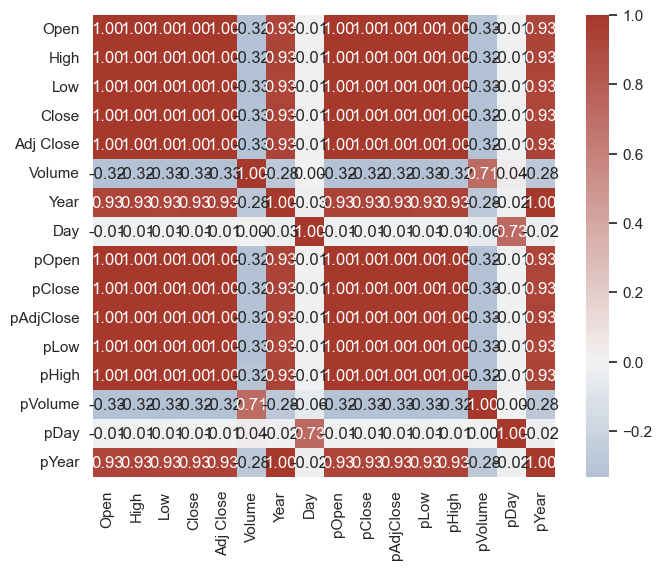

time: 488 ms (started: 2022-12-10 16:58:30 -08:00)


In [205]:
corr = df.corr()

plt.figure(figsize=(8,6))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(corr, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

<AxesSubplot:>

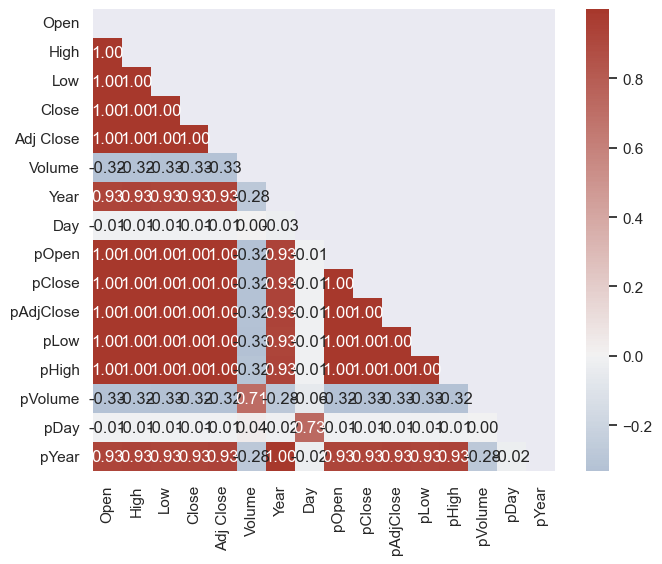

time: 383 ms (started: 2022-12-10 16:58:30 -08:00)


In [206]:
plt.figure(figsize=(8,6))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

# Analysis

# Predictions

In [207]:
df_en_train = df_en.loc[:(len(df_en)*.8)].copy()
df_en_test = df_en.loc[((len(df_en)*.8)+1):].copy()

X_train = df_en_train[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
y_train = df_en_train["Direction"]
X_test = df_en_test[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
y_test = df_en_test["Direction"]

time: 2.5 ms (started: 2022-12-10 16:58:31 -08:00)


In [208]:
z = pd.DataFrame({
    "pDayName":[0], 
    "pOpen":[45.66], 
    "pClose":[48.77], 
    "pHigh":[49.12], 
    "pLow":[45.32], 
    "pAdjClose":[48.77], 
    "pVolume":[77636800], 
    "pYear":[2018], 
    "pMonth":[12], 
    "pDay":[11],
    "pDirection":[0]
})

# Fit k-nearest neighbors
model = KNeighborsRegressor(n_neighbors=72)
model.fit(
    X=df_en_train[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]],
    y=df_en_train["Direction"]
)

# Make predictions at those feature values.
predicted = model.predict(
    X = df_en_test[["pDayName", "pOpen", "pClose", "pHigh", "pLow", "pAdjClose", "pVolume", "pYear", "pMonth", "pDay", "pDirection"]]
)

rounded = round(model.predict(z)[0])
if (rounded == 0):
    d = "Down"
elif (rounded == 1):
    d = "Up"
else:
    d = "Stagnant"

print("Predicted Direction of day: " + str(model.predict(z)[0]))
print("Predicted Direction of day: " + d)

Predicted Direction of day: 0.5694444444444444
Predicted Direction of day: Up
time: 10.1 ms (started: 2022-12-10 16:58:31 -08:00)


## Accuracy

Maximum accuracy: 0.5737051792828686 at K = 72


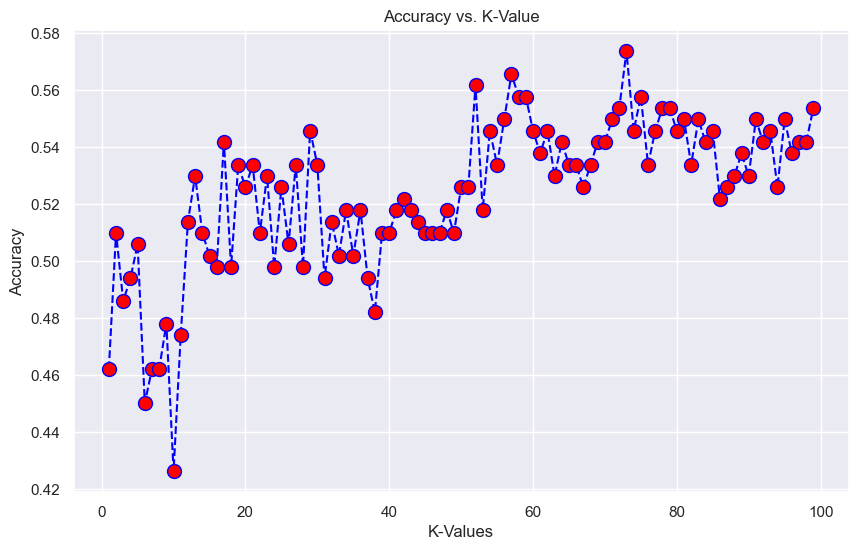

time: 520 ms (started: 2022-12-10 16:58:31 -08:00)


In [209]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K-Value')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =",acc.index(max(acc)))